# Install Packages

In [ ]:
system('sudo apt-get install -y libnlopt-dev', intern=TRUE)

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following package was automatically installed and is no longer required:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [5] "  libnvidia-common-470"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
 [6] "Use 'sudo apt autoremove' to remove it."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
 [7] "The following additional packages will be installed:"                                                                  

In [ ]:
install.packages("rstatix")
install.packages("ggpubr")
install.packages("agricolae")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’, ‘corrplot’, ‘car’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sass’, ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘proxy’, ‘httpuv’, ‘xtable’, ‘fontawesome’, ‘sourcetools’, ‘later’, ‘promises’, ‘bslib’, ‘R.cache’, ‘e1071’, ‘shiny’, ‘miniUI’, ‘styler’, ‘classInt’, ‘labelled’, ‘combinat’, ‘questionr’, ‘klaR’, ‘AlgDesign’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape2’


Installing package into ‘/usr/local

In [ ]:
library(tidyverse)
library(ggpubr)
library(rstatix)
library(agricolae)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter




# CRD

## Data Preparation

In [ ]:
data("PlantGrowth")
dat_crd <- PlantGrowth

In [ ]:
str(dat_crd)

'data.frame':	30 obs. of  2 variables:
 $ weight: num  4.17 5.58 5.18 6.11 4.5 4.61 5.17 4.53 5.33 5.14 ...
 $ group : Factor w/ 3 levels "ctrl","trt1",..: 1 1 1 1 1 1 1 1 1 1 ...


In [ ]:
dat_crd %>%
  group_by(group) %>%
  get_summary_stats(weight, type = "common")

group,variable,n,min,max,median,iqr,mean,sd,se,ci
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ctrl,weight,10,4.17,6.11,5.155,0.743,5.032,0.583,0.184,0.417
trt1,weight,10,3.59,6.03,4.550,0.662,4.661,0.794,0.251,0.568
trt2,weight,10,4.92,6.31,5.435,0.467,5.526,0.443,0.140,0.317


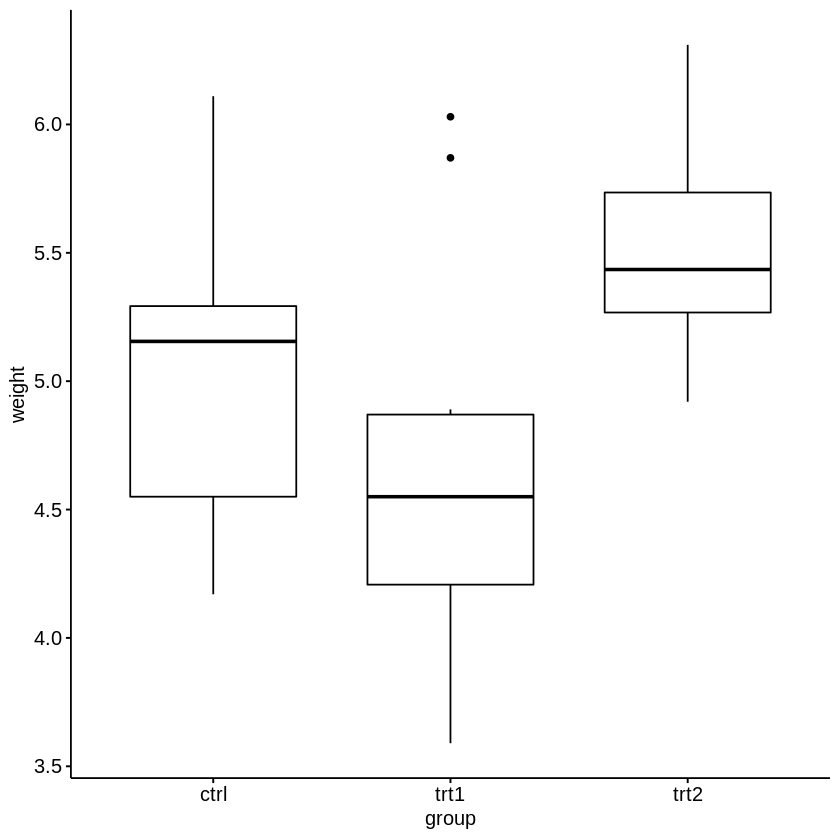

In [ ]:
ggboxplot(PlantGrowth, x = "group", y = "weight")

## Diagnostic Test
- Outlier
- Normality
- Homogneity of Variance

In [ ]:
# outlier
dat_crd %>% 
  group_by(group) %>%
  identify_outliers(weight)

group,weight,is.outlier,is.extreme
<fct>,<dbl>,<lgl>,<lgl>
trt1,5.87,TRUE,FALSE
trt1,6.03,TRUE,FALSE


variable,statistic,p.value
<chr>,<dbl>,<dbl>
u_crd,0.9660681,0.4378986


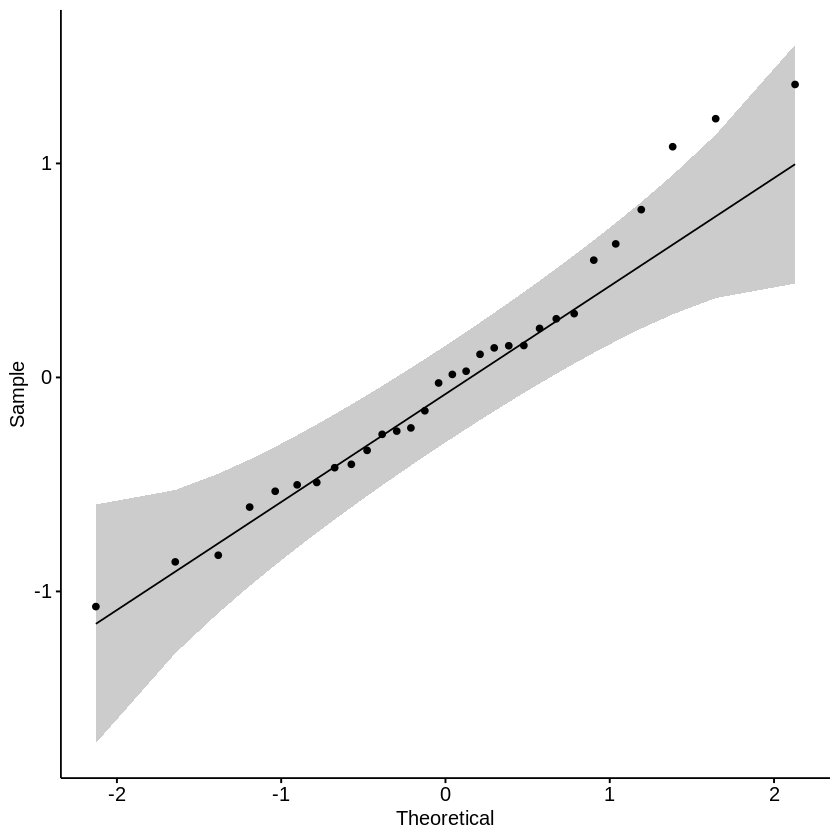

In [ ]:
# nomality
model_crd  <- lm(weight ~ group, data = dat_crd)
u_crd <- residuals(model_crd)

## create a QQ plot of residuals
ggqqplot(u_crd)

# compute Shapiro-Wilk test of normality
shapiro_test(u_crd)

In [ ]:
# homogneity of variance
dat_crd %>% levene_test(weight ~ group)

df1,df2,statistic,p
<int>,<int>,<dbl>,<dbl>
2,27,1.119186,0.3412266


## ANOVA

In [ ]:
model_crd <- lm(weight ~ group, data = dat_crd)
anova_crd <- aov(weight ~ group, data = dat_crd)
anova_crd
anova(model_crd)

Call:
   aov(formula = weight ~ group, data = dat_crd)

Terms:
                   group Residuals
Sum of Squares   3.76634  10.49209
Deg. of Freedom        2        27

Residual standard error: 0.6233746
Estimated effects may be unbalanced

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
group,2,3.76634,1.8831700,4.846088,0.01590996
Residuals,27,10.49209,0.3885959,NA,NA


## Post-Hoc Test

In [ ]:
# tukey
pwc_crd_tukey <- dat_crd %>% tukey_hsd(weight ~ group)
pwc_crd_tukey

,term,group1,group2,null.value,estimate,conf.low,conf.high,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,group,ctrl,trt1,0,-0.371,-1.0622161,0.3202161,0.391,ns
2,group,ctrl,trt2,0,0.494,-0.1972161,1.1852161,0.198,ns
3,group,trt1,trt2,0,0.865,0.1737839,1.5562161,0.012,*


In [ ]:
# tukey: agricolae
pwc_crd_tukey2 <- HSD.test(model_crd, "group", group=FALSE, console=TRUE)


Study: model_crd ~ "group"

HSD Test for weight 

Mean Square Error:  0.3885959 

group,  means

     weight       std  r  Min  Max
ctrl  5.032 0.5830914 10 4.17 6.11
trt1  4.661 0.7936757 10 3.59 6.03
trt2  5.526 0.4425733 10 4.92 6.31

Alpha: 0.05 ; DF Error: 27 
Critical Value of Studentized Range: 3.506426 

Comparison between treatments means

            difference pvalue signif.        LCL        UCL
ctrl - trt1      0.371 0.3909         -0.3202161  1.0622161
ctrl - trt2     -0.494 0.1980         -1.1852161  0.1972161
trt1 - trt2     -0.865 0.0120       * -1.5562161 -0.1737839


In [ ]:
# lsd
pwc_crd_lsd <- LSD.test(model_crd, "group", group=FALSE, console=TRUE)


Study: model_crd ~ "group"

LSD t Test for weight 

Mean Square Error:  0.3885959 

group,  means and individual ( 95 %) CI

     weight       std  r      LCL      UCL  Min  Max
ctrl  5.032 0.5830914 10 4.627526 5.436474 4.17 6.11
trt1  4.661 0.7936757 10 4.256526 5.065474 3.59 6.03
trt2  5.526 0.4425733 10 5.121526 5.930474 4.92 6.31

Alpha: 0.05 ; DF Error: 27
Critical Value of t: 2.051831 

Comparison between treatments means

            difference pvalue signif.        LCL         UCL
ctrl - trt1      0.371 0.1944         -0.2010126  0.94301261
ctrl - trt2     -0.494 0.0877       . -1.0660126  0.07801261
trt1 - trt2     -0.865 0.0045      ** -1.4370126 -0.29298739


In [ ]:
# lsd bonferonni correction
pwc_crd_lsd_bon <- LSD.test(model_crd, "group", group=FALSE, console=TRUE, p.adj="bonferroni")


Study: model_crd ~ "group"

LSD t Test for weight 
P value adjustment method: bonferroni 

Mean Square Error:  0.3885959 

group,  means and individual ( 95 %) CI

     weight       std  r      LCL      UCL  Min  Max
ctrl  5.032 0.5830914 10 4.627526 5.436474 4.17 6.11
trt1  4.661 0.7936757 10 4.256526 5.065474 3.59 6.03
trt2  5.526 0.4425733 10 5.121526 5.930474 4.92 6.31

Alpha: 0.05 ; DF Error: 27
Critical Value of t: 2.552459 

Comparison between treatments means

            difference pvalue signif.        LCL        UCL
ctrl - trt1      0.371 0.5832         -0.3405786  1.0825786
ctrl - trt2     -0.494 0.2630         -1.2055786  0.2175786
trt1 - trt2     -0.865 0.0134       * -1.5765786 -0.1534214


In [ ]:
# duncan
pwc_crd_duncan <- duncan.test(model_crd, "group", group=FALSE, console=TRUE)


Study: model_crd ~ "group"

Duncan's new multiple range test
for weight 

Mean Square Error:  0.3885959 

group,  means

     weight       std  r  Min  Max
ctrl  5.032 0.5830914 10 4.17 6.11
trt1  4.661 0.7936757 10 3.59 6.03
trt2  5.526 0.4425733 10 4.92 6.31

Comparison between treatments means

            difference pvalue signif.        LCL         UCL
ctrl - trt1      0.371 0.1944         -0.2010126  0.94301261
ctrl - trt2     -0.494 0.0877       . -1.0660126  0.07801261
trt1 - trt2     -0.865 0.0060      ** -1.4659777 -0.26402234


# RCBD 

## Data Preparation

In [ ]:
# data
path <- "data_rcbd.csv"
dat_rcbd <- read_csv(path)
dat_rcbd

Rows: 12 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): block, cultivar
dbl (3): yield, row, col

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


block,cultivar,yield,row,col
<chr>,<chr>,<dbl>,<dbl>,<dbl>
B1,C1,7.4,2,1
B1,C2,9.8,3,1
B1,C3,7.3,1,1
B1,C4,9.5,4,1
B2,C1,6.5,1,2
B2,C2,6.8,4,2
B2,C3,6.1,3,2
B2,C4,8.0,2,2
B3,C1,5.6,2,3


## Diagnostic Test

cultivar,variable,n,min,max,median,iqr,mean,sd,se,ci
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C1,yield,3,5.6,7.4,6.5,0.90,6.5,0.900,0.520,2.236
C2,yield,3,6.2,9.8,6.8,1.80,7.6,1.929,1.114,4.791
C3,yield,3,6.1,7.3,6.4,0.60,6.6,0.624,0.361,1.551
C4,yield,3,7.4,9.5,8.0,1.05,8.3,1.082,0.624,2.687


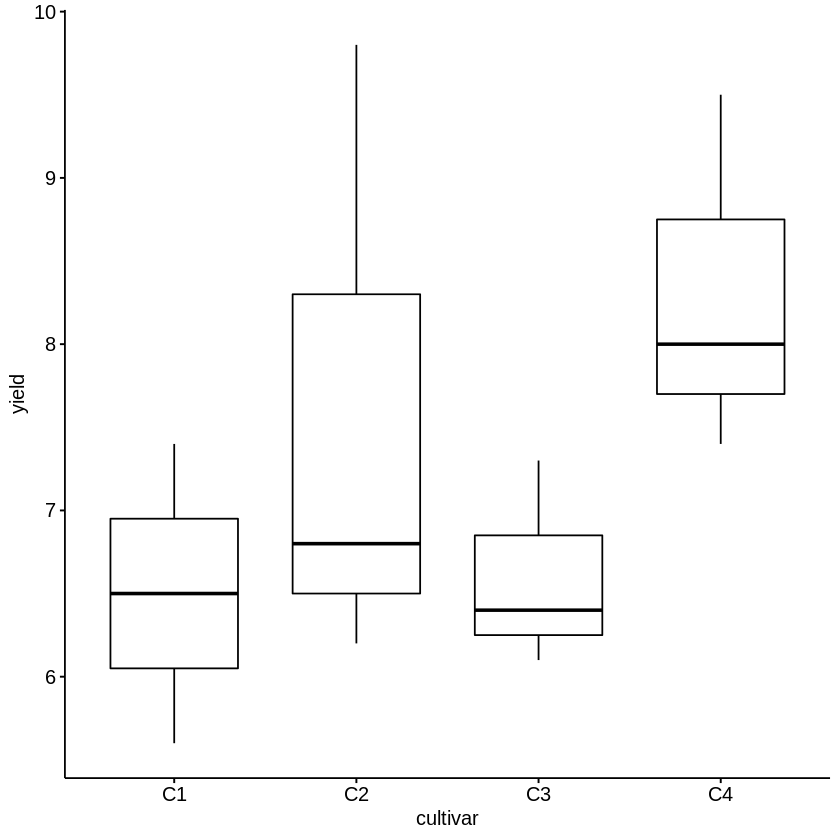

In [ ]:
dat_rcbd %>%
  group_by(cultivar) %>%
  get_summary_stats(yield, type = "common")

ggboxplot(dat_rcbd, x = "cultivar", y = "yield")

rep,variable,n,min,max,median,iqr,mean,sd,se,ci
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
R1,white,14,0.00,26.39,4.420,7.185,8.339,9.431,2.520,5.445
R2,white,14,0.00,25.36,4.085,11.218,8.101,8.497,2.271,4.906
R3,white,14,0.61,15.69,3.065,3.070,4.391,3.905,1.044,2.255


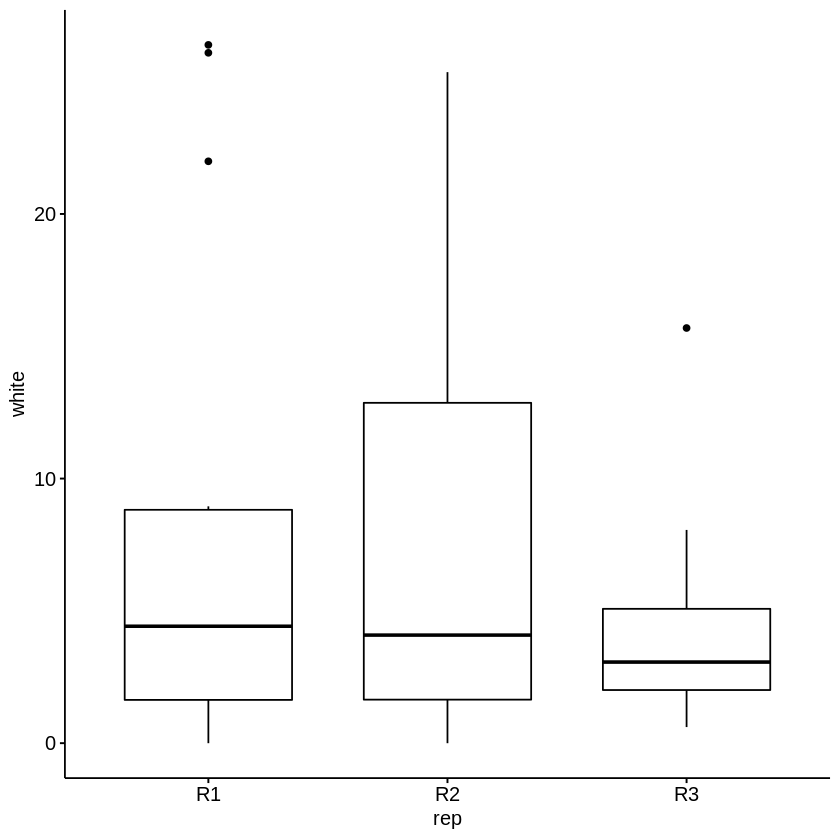

In [ ]:
dat_rcbd <- %>%
  group_by(block) %>%
  get_summary_stats(, type = "common")
  
ggboxplot(dat_rcbd, x = "rep", y = "white")

In [ ]:
# outlier
dat_rcbd %>% 
  group_by(cultivar) %>%
  identify_outliers(yield)

dat_rcbd %>% 
  group_by(block) %>%
  identify_outliers(yield)

cultivar,block,yield,row,col,is.outlier,is.extreme
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>


block,cultivar,yield,row,col,is.outlier,is.extreme
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>


variable,statistic,p.value
<chr>,<dbl>,<dbl>
u_rcbd,0.9175878,0.2665607


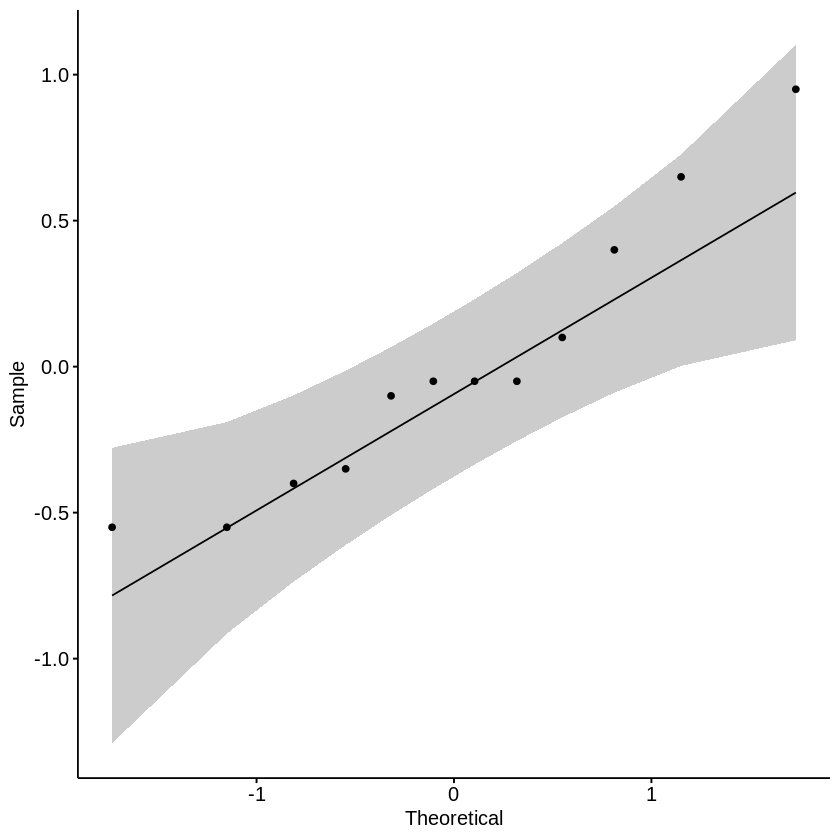

In [ ]:
# normality
model_rcbd  <- lm(yield ~ block + cultivar, data = dat_rcbd)
u_rcbd <- residuals(model_rcbd)

## create a QQ plot of residuals
ggqqplot(u_rcbd)

# compute Shapiro-Wilk test of normality
shapiro_test(u_rcbd)

In [ ]:
# variance do not found a test for this case
dat_rcbd %>% levene_test(yield ~ block)

dat_rcbd %>% levene_test(yield ~ cultivar)

Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


df1,df2,statistic,p
<int>,<int>,<dbl>,<dbl>
2,9,2.706897,0.1201127


Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


df1,df2,statistic,p
<int>,<int>,<dbl>,<dbl>
3,8,0.3893557,0.7639802


## ANOVA

In [ ]:
model_rcbd <- lm(yield ~ block + cultivar, data = dat_rcbd)
anova_rcbd <- aov(yield ~ block + cultivar, data = dat_rcbd)
anova_rcbd
anova(model_rcbd)

Call:
   aov(formula = yield ~ block + cultivar, data = dat_rcbd)

Terms:
                block cultivar Residuals
Sum of Squares   9.78     6.63      2.40
Deg. of Freedom     2        3         6

Residual standard error: 0.6324555
Estimated effects may be unbalanced

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
block,2,9.78,4.89,12.225,0.007650536
cultivar,3,6.63,2.21,5.525,0.036730328
Residuals,6,2.40,0.40,NA,NA


## Post-Hoc Test

In [ ]:
# tukey
pwc_rcbd_tukey <- dat_rcbd %>% tukey_hsd(yield ~ block + cultivar)
pwc_rcbd_tukey

,term,group1,group2,null.value,estimate,conf.low,conf.high,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,block,B1,B2,0,-1.65,-3.02217404,-0.2778260,0.02380,*
2,block,B1,B3,0,-2.10,-3.47217404,-0.7278260,0.00797,**
3,block,B2,B3,0,-0.45,-1.82217404,0.9221740,0.60000,ns
4,cultivar,C1,C2,0,1.10,-0.68762007,2.8876201,0.24500,ns
5,cultivar,C1,C3,0,0.10,-1.68762007,1.8876201,0.99700,ns
6,cultivar,C1,C4,0,1.80,0.01237993,3.5876201,0.04860,*
7,cultivar,C2,C3,0,-1.00,-2.78762007,0.7876201,0.30700,ns
8,cultivar,C2,C4,0,0.70,-1.08762007,2.4876201,0.56600,ns
9,cultivar,C3,C4,0,1.70,-0.08762007,3.4876201,0.06090,ns


In [ ]:
# tukey: agricolae
pwc_rcbd_tukey2 <- HSD.test(model_rcbd, "cultivar", group=FALSE, console=TRUE)


Study: model_rcbd ~ "cultivar"

HSD Test for yield 

Mean Square Error:  0.4 

cultivar,  means

   yield       std r Min Max
C1   6.5 0.9000000 3 5.6 7.4
C2   7.6 1.9287302 3 6.2 9.8
C3   6.6 0.6244998 3 6.1 7.3
C4   8.3 1.0816654 3 7.4 9.5

Alpha: 0.05 ; DF Error: 6 
Critical Value of Studentized Range: 4.895599 

Comparison between treatments means

        difference pvalue signif.        LCL         UCL
C1 - C2       -1.1 0.2447         -2.8876201  0.68762007
C1 - C3       -0.1 0.9971         -1.8876201  1.68762007
C1 - C4       -1.8 0.0486       * -3.5876201 -0.01237993
C2 - C3        1.0 0.3066         -0.7876201  2.78762007
C2 - C4       -0.7 0.5656         -2.4876201  1.08762007
C3 - C4       -1.7 0.0609       . -3.4876201  0.08762007


In [ ]:
# lsd
pwc_rcbd_lsd <- LSD.test(model_rcbd, "cultivar", group=FALSE, console=TRUE)


Study: model_rcbd ~ "cultivar"

LSD t Test for yield 

Mean Square Error:  0.4 

cultivar,  means and individual ( 95 %) CI

   yield       std r      LCL      UCL Min Max
C1   6.5 0.9000000 3 5.606514 7.393486 5.6 7.4
C2   7.6 1.9287302 3 6.706514 8.493486 6.2 9.8
C3   6.6 0.6244998 3 5.706514 7.493486 6.1 7.3
C4   8.3 1.0816654 3 7.406514 9.193486 7.4 9.5

Alpha: 0.05 ; DF Error: 6
Critical Value of t: 2.446912 

Comparison between treatments means

        difference pvalue signif.        LCL        UCL
C1 - C2       -1.1 0.0772       . -2.3635798  0.1635798
C1 - C3       -0.1 0.8528         -1.3635798  1.1635798
C1 - C4       -1.8 0.0131       * -3.0635798 -0.5364202
C2 - C3        1.0 0.1009         -0.2635798  2.2635798
C2 - C4       -0.7 0.2240         -1.9635798  0.5635798
C3 - C4       -1.7 0.0166       * -2.9635798 -0.4364202


In [ ]:
# lsd bonferroni
pwc_rcbd_lsd <- LSD.test(model_rcbd, "cultivar", group=FALSE, console=TRUE, p.adj="bonferroni")


Study: model_rcbd ~ "cultivar"

LSD t Test for yield 
P value adjustment method: bonferroni 

Mean Square Error:  0.4 

cultivar,  means and individual ( 95 %) CI

   yield       std r      LCL      UCL Min Max
C1   6.5 0.9000000 3 5.606514 7.393486 5.6 7.4
C2   7.6 1.9287302 3 6.706514 8.493486 6.2 9.8
C3   6.6 0.6244998 3 5.706514 7.493486 6.1 7.3
C4   8.3 1.0816654 3 7.406514 9.193486 7.4 9.5

Alpha: 0.05 ; DF Error: 6
Critical Value of t: 3.862991 

Comparison between treatments means

        difference pvalue signif.        LCL       UCL
C1 - C2       -1.1 0.4632         -3.0948398 0.8948398
C1 - C3       -0.1 1.0000         -2.0948398 1.8948398
C1 - C4       -1.8 0.0783       . -3.7948398 0.1948398
C2 - C3        1.0 0.6056         -0.9948398 2.9948398
C2 - C4       -0.7 1.0000         -2.6948398 1.2948398
C3 - C4       -1.7 0.0994       . -3.6948398 0.2948398


In [ ]:
# duncan
pwc_rcbd_duncan <- duncan.test(model_rcbd, "cultivar", group=FALSE, console=TRUE)


Study: model_rcbd ~ "cultivar"

Duncan's new multiple range test
for yield 

Mean Square Error:  0.4 

cultivar,  means

   yield       std r Min Max
C1   6.5 0.9000000 3 5.6 7.4
C2   7.6 1.9287302 3 6.2 9.8
C3   6.6 0.6244998 3 6.1 7.3
C4   8.3 1.0816654 3 7.4 9.5

Comparison between treatments means

        difference pvalue signif.        LCL        UCL
C1 - C2       -1.1 0.0855       . -2.4096038  0.2096038
C1 - C3       -0.1 0.8528         -1.3635798  1.1635798
C1 - C4       -1.8 0.0165       * -3.1324023 -0.4675977
C2 - C3        1.0 0.1009         -0.2635798  2.2635798
C2 - C4       -0.7 0.2240         -1.9635798  0.5635798
C3 - C4       -1.7 0.0192       * -3.0096038 -0.3903962
